In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random


In [2]:
pip install ucimlrepo

In [55]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'ID': 276, 'type': 'NATIVE', 'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'venue': 'International Journal of Intel

In [56]:
df=pd.DataFrame(X)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


In [57]:
df.shape

(3810, 7)

In [58]:

# Normalize features
X = preprocessing.StandardScaler().fit_transform(X)


In [66]:
# Kernel options for NuSVC
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize storage for results
results = []

In [67]:
# Run for 10 samples
for sample_id in range(1, 11):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=sample_id)

    best_accuracy = 0
    best_kernel = ''
    best_nu = 0
    best_epsilon = 0
    accuracy_per_iter = []

    # 100 random hyperparameter combinations per sample
    for i in range(100):
        kernel = random.choice(kernel_list)
        nu = round(random.uniform(0.01, 0.99), 2)
        epsilon = round(random.uniform(0.001, 0.1), 3)  # not used directly in NuSVC

        try:
            model = NuSVC(nu=nu, kernel=kernel)
            model.fit(X_train, y_train.values.ravel())
            y_pred = model.predict(X_test)
            accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
        except Exception as e:
            accuracy = 0  # Graceful fallback

        accuracy_per_iter.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_kernel = kernel
            best_nu = nu
            best_epsilon = epsilon

    # Store best result for this sample
    results.append({
        'Sample #': f'S{sample_id}',
        'Best Accuracy': best_accuracy,
        'Best Kernel': best_kernel,
        'Best Nu': best_nu,
        'Best Epsilon': best_epsilon,
        'Convergence': accuracy_per_iter
    })

In [68]:
# Create and display the results table
df_results = pd.DataFrame(results)[['Sample #', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon']]
print(df_results.to_string(index=False))

Sample #  Best Accuracy Best Kernel  Best Nu  Best Epsilon
      S1          93.35         rbf     0.16         0.023
      S2          92.74      linear     0.18         0.079
      S3          93.00      linear     0.29         0.082
      S4          91.86      linear     0.16         0.076
      S5          93.00      linear     0.24         0.031
      S6          92.48      linear     0.18         0.034
      S7          92.56         rbf     0.28         0.040
      S8          93.35      linear     0.33         0.012
      S9          92.21      linear     0.19         0.077
     S10          92.74         rbf     0.14         0.071


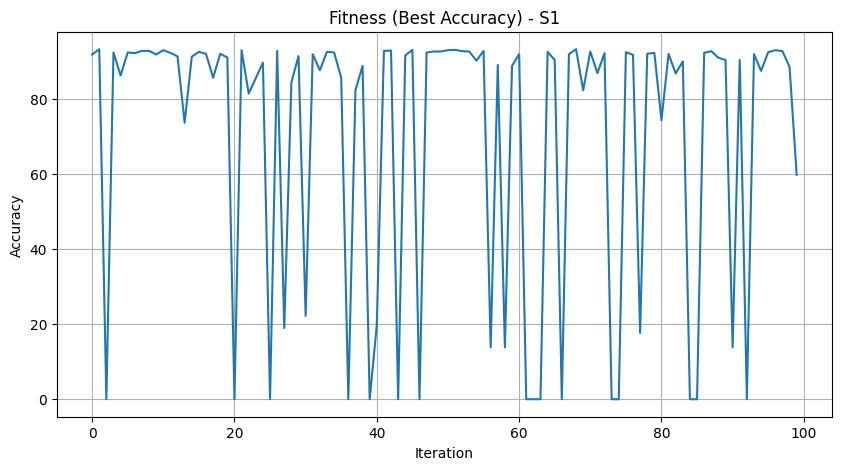

In [69]:
# Plot convergence for best sample
best_sample = max(results, key=lambda x: x['Best Accuracy'])
plt.figure(figsize=(10, 5))
plt.plot(best_sample['Convergence'])
plt.title(f"Fitness (Best Accuracy) - {best_sample['Sample #']}")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()